# Instructions

Your submission will be tested with the code tester. It is important to follow these instructions to ensure your work tests properly.

- Do not change the content of the cells under __SETUP__ and __TESTS__
- Work only in the __YOUR WORK__ area
- Rename the notebook with your group at the end (subsitute XX with your group number).
- Assign the results of each numbered question to the appropriate test variable. For example, the answer of `1.` should be assigned to `test_1`
- Rounding: use the supplied function `hround` to round decimal numbers when instructed. It's important to use this function because there are [multiple ways to round numbers in Python](https://www.knowledgehut.com/blog/programming/python-rounding-numbers) and they may not result in the same value that the tester is testing against.
- Ensure your run the cells under __SETUP__ before you run your work
- Before you submit your work, ensure you clean up your notebook. Your notebook has to run without an error in order to be tested. The easiest way to ensure is to `Kernel->Restart & Run All`
- Answers are provided in along with this notebook in eLC (look a picture named `solution_key`) for your convenience
- You will need to write a program to calculate the answers. Setting the answers to be their correct values without solving them is considered *hardcoding* and will result in zero grade for the assignment as well as a potential academic honesty violation.
- You can also test your submission using [the online code tester](https://notebook-tester.safadi-puzzler.com/)


# SETUP

In [1]:
import pandas as pd
import numpy as np

In [2]:
# DO NOT EDIT OR CHANGE THE CONTENT OF THIS CELL
scenario = 0

In [3]:
def hround(number):
    return round(number, 3 - scenario)

In [4]:
# a function that creates the gini coefficient for a given series of values
# https://www.statology.org/gini-coefficient-python/
#define function to calculate Gini coefficient
def gini(x):
    # modification, we are not interested in x of size 1
    if len(x) < 2:
        return np.nan

    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [5]:
test_1=test_2=test_3=test_4=test_5=test_6=test_7=test_8=test_9=test_10=0.0
test_11=test_12=test_13=test_14=test_15=test_16=test_17=test_18=test_19=test_20=0.0

In this homework, we are going to use data from [Seshat: Global History Databank](https://seshatdatabank.info/). This data bank "collects what is currently known about the social and political organization of human societies and how civilizations have evolved over time."

This data has been used in several research projects to test hypotheses about human development and history. We are going to use a subset of this data that was curated in [Turchin et al. (2017)](https://doi.org/10.1073/pnas.1708800115). You do not need to but are strongly encourage to read the paper.

The CSV file `pnas.1708800115.sd01.csv` contains data about the following variables:

- `NGA`: Natural Geographic Areas. Each NGA is defined spatially by a
boundary drawn on the world map that encloses an area delimited by naturally occurring geographical features (for example, river basins, coastal plains, valleys, and islands). The extent of the NGAs does not change over time
- `PolID`: unique id of the polity
- `Time`: year using the Gregorian/Julian calendar notation (e.g., CE and BCE negative values) in 100 year increments
- `PolPop`: polity population
- `PolTerr`: polity territory
- `CapPop`: capital population
- `levels`: hierarchy levels
- `government`: features of governance (aggregate of data about Officers, Bureaucrats, Court, Merit Promotion, Soldires, Lawyers, Judges, Government buildings, Priests, Exam system, and Legal code)
- `infrastr`: features of infrastructure (aggregate of data about Bridges, Canals, Ports, Mines, Roads, Irrigation, Market, Food storatge, and Water supply)
- `writing`: features of information systems (aggregate of data about Mnemonic, Script, Lists, Alphabet, Records, Non-phonetic)
- `texts`: features of written records and texts (Calendar, Science literature, Sacred texts, History, Religious literature, Finction, Practical literature, Philosophy)
- `money`: features of the monetary system (aggregate of Articles, Tokens, Metals, Foreign coins, Indigenous coins, Paper currency)
- `irep`: the original data were imputed. So each `PolId` `Time` combination is repeated 20 times with slightly different values of the other indicator variables.



The CSV file `NGAClassification.csv` contains a classification of each `NGA` across two categories, `Region` the larger geographic area (e.g., Africa, Europe), and `Period` which is the relative period when this `NGA` reached considerable social complexity (Early, Intermediate, and late)


In [6]:
ngas = pd.read_csv('pnas.1708800115.sd01.csv').iloc[scenario:]
ngas.head(2)

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,irep
0,Big Island Hawaii,Hawaii1,1000,3.636111,2.585663,2.432944,0.1,0.090909,0.100000,0.10,0.1,1.8,1
1,Big Island Hawaii,Hawaii2,1200,3.672515,3.357152,2.414818,0.1,0.090909,0.090909,0.15,0.0,1.8,1


In [7]:
regions = pd.read_csv('NGAClassification.csv', index_col=0)
regions.head()

,Late Complexity,Intermediate Complexity,Early Complexity
Africa,Ghanaian Coast,Niger Inland Delta,Upper Egypt
Europe,Iceland,Paris Basin,Latium
Central Eurasia,Lena River Valley,Orkhon Valley,Sogdiana
Southwest Asia,Yemeni Coastal Plain,Konya Plain,Susiana
South Asia,Garo Hills,Deccan,Kachi Plain


# Questions

We want to join the two data frames `ngas` and `regions` on `NGA`. 

1. let us make sure the same NGAs are the same across the two data sets. The number of NGAs in `regions` is simply the number of cells in the data frame. Calculate this number. Next calculate the number of unique NGAs in `ngas`. Display the two numbers as a tuple.

2. join the two data fames on the name of `NGA`. Let us call the new data frame `data`. Show the first 3 records. `data` should have same columns as `ngas` in addition to `Region` and `Complexity`. Note: you will need to work a bit on `regions` before being able to join it with `ngas`

Exploratory analyses. (all float values need to be rounded with `hround`)

3. Focusing on the columns `PolPop`, `PolTerr`, `CapPop`, `levels`, `government`, `infrastr`, `writing`, `texts`, `money` calculate the average of these variables per `Time`. Show the first five and last five rows from the resulting data frame.

Bonus (not graded). Invoke the .plot method on the resulting data frame for a quick line plot visualization of the trends. What do you observe?

4. Create a table to present the average `PolPop` per `Region` on the row-axis and `Perios` on the col-axis.

5. Building on (4) create a similar table to preset the averages of `PolPop`, `PolTerr`, `CapPop`. Organize the table so each of these variables has three sub columns representing the `Period` on the col axis.

6. Which polity `NGA` has the maximum value of hierarchy `levels`, what is the value of `levels`? Return a tuple

7. Repeat the previous analysis per `Region`. Return a series indexed by region.

Next, we want to perform some explanatory analyses focusing on the evolution of social complexity. Our hypothesis is about regional asymmetry. Specifically, higher asymmetry lead to more social complexity evolution. Asymmetry is defined in relation to the differences multiple NGAs that exist in the region & time combinations. If these polities have equal levels of social complexity, asymmetry is low. However, if there a large inequality in the distribution of social complexity asymmetry is high.

Specifically, we are going to use the [Gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient) as a measurement of asymmetry. This coefficient ranges from 0 reflecting perfect equality to 1 reflecting maximal inequality. The function `gini` is provided to you in the beginning of this notebook. This function takes a series of values as input and return a float representing the Gini coefficient of the series. Let us test it.

8. create a series of these values: 100, 100, 100, 100, 100. Calculate the gini coefficient.

9. create a series of these values: 0, 10, 100, 1000, 10000. Calculate the gini coefficient.

Now let us run the gini function on our data. Let us start easy:

Focusing on `Europe` as a `Region`, the three `Time` values of -3600, 0 and 1800, and `levels` as an indicator. Select a subset of `data` pertaining to these selection criteria

10. What is the gini coefficient in Time 0?

11. What is the gini coefficient in Time 1700?

We need to repeat the previous analysis per each indicator among `PolPop`, `PolTerr`, `CapPop`, `levels`, `government`, `infrastr`, `writing`, `texts`, `money` as well as per `Region`, `Time` combinations. The value of each gini coefficient should be added to `data` in a new column labeled `col_gini` for example, `PolPop_gini`. Note that the gini coefficient is calculated per `Region`, `Time` combination, so these calculated values will repeat for all NGAs in the same `Time`, `Region` combinations.

12. show the head of the resulting data frame


13. For a prelimenary test of the hypothesis, let us calculate the correlation coefficient between each indicator and its gini. You can calculate pairwise correlations using the data frame function `.corr` for example `data.corr()`. We are not interested in all correlations just the correlations between each column and its gini. For example between `PolPop` and `PolPop_gini`. Create a dictionary containing these correlations per each indicator. 

(not graded, what do the results so far mean?)

14. We want to add a caveat to the analysis. First we are interested in the relation between the gini and the evolution of the indicators. You will need to use a time index and then shift the value of each indicator per NGA, irep combination. Call the new column col_future, for example `PolPop_future`. Show the tail of the data frame.

15. Create new columns representing the change in complexity. Specifically, change = future - current. for example, `PolPop_change = PolPop_future - PolPop`. Create a change column per indicator. Show the tail of the data frame. 

16. Repeat analysis (13) but correlate each  the gini coefficient with the indicator change.

(not graded, what do these results mean?)


# YOUR WORK HERE

In [8]:
# Question 1
test_1 = (regions.size, ngas['NGA'].nunique())

In [9]:
# Question 2
region_series = regions.stack()
region_df = pd.DataFrame(region_series)
region_df = region_df.reset_index()
region_df = region_df.rename(columns={'level_0': 'Region', 'level_1': 'Period', 0: 'NGA'})
data = ngas.merge(region_df)

test_2 = data.head(3)

In [10]:
# Question 3
avgs = hround(data.groupby('Time').mean().drop('irep', axis=1))

test_3 = pd.concat([avgs.head(), avgs.tail()])

/var/folders/51/h1nmh05j5mz75s5kwn0ngjxr0000gn/T/ipykernel_47777/144299817.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avgs = hround(data.groupby('Time').mean().drop('irep', axis=1))


<AxesSubplot:xlabel='Time'>

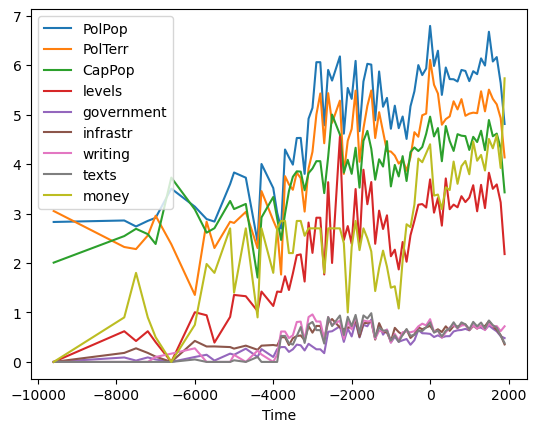

In [11]:
# Bonus Question
avgs.plot()

The trends we see in the line plot show that human societies and civilization have been somewhat steadily grown witht regard to population, territory, and government structure and levels. Infrastructure technology has advanced, but the texts and writing have not seen much growth over the years. Since the around the 1900s, it seems like we have seen a decline in most of the variables included in the plot. World events must be responsible for the up or down ticks in the lines.  

In [12]:
# Question 4
df = hround(data.groupby(['Region', 'Period'])['PolPop'].mean())
df1 = pd.DataFrame(df)
df1 = df1.unstack()

test_4 = df1['PolPop']

In [13]:
# Question 5
test_5 = hround(data.groupby(['Region', 'Period'])['PolPop', 'PolTerr', 'CapPop'].mean().unstack())

/var/folders/51/h1nmh05j5mz75s5kwn0ngjxr0000gn/T/ipykernel_47777/945066338.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test_5 = hround(data.groupby(['Region', 'Period'])['PolPop', 'PolTerr', 'CapPop'].mean().unstack())


In [14]:
# Question 6
test_6 = tuple(hround(data.loc[data['levels'] == data['levels'].max(), ['NGA', 'levels']]).iloc[0])

In [15]:
# Question 7
test_7 = data.groupby('Region').apply(lambda x: x.loc[x['levels'].idxmax(), 'NGA'])

In [16]:
# Question 8
values1 = [100, 100, 100, 100, 100]
gini_series1 = pd.Series(values1)

test_8 = gini(gini_series1)

In [17]:
# Question 9
values2 = [0, 10, 100, 1000, 10000]
gini_series2 = pd.Series(values2)

test_9 = hround(gini(gini_series2))

In [18]:
# Question 10
test_10 = hround(gini(data.loc[ (data['Region'] == 'Europe') & (data['Time'] == 0) ]['levels']))

In [19]:
# Question 11
test_11 = hround(gini(data.loc[ (data['Region'] == 'Europe') & (data['Time'] == 1700) ]['levels']))

In [20]:
# Question 12
data['PolPop_gini'] = hround(data.groupby(['Time', 'Region'])['PolPop'].transform(lambda x: gini(x)))
data['PolTerr_gini'] = hround(data.groupby(['Time', 'Region'])['PolTerr'].transform(lambda x: gini(x)))
data['CapPop_gini'] = hround(data.groupby(['Time', 'Region'])['CapPop'].transform(lambda x: gini(x)))
data['levels_gini'] = hround(data.groupby(['Time', 'Region'])['levels'].transform(lambda x: gini(x)))
data['government_gini'] = hround(data.groupby(['Time', 'Region'])['government'].transform(lambda x: gini(x)))
data['infrastr_gini'] = hround(data.groupby(['Time', 'Region'])['infrastr'].transform(lambda x: gini(x)))
data['writing_gini'] = hround(data.groupby(['Time', 'Region'])['writing'].transform(lambda x: gini(x)))
data['texts_gini'] = hround(data.groupby(['Time', 'Region'])['texts'].transform(lambda x: gini(x)))
data['money_gini'] = hround(data.groupby(['Time', 'Region'])['money'].transform(lambda x: gini(x)))

test_12 = data.head()

/var/folders/51/h1nmh05j5mz75s5kwn0ngjxr0000gn/T/ipykernel_47777/3891847565.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return total / (len(x)**2 * np.mean(x))
/var/folders/51/h1nmh05j5mz75s5kwn0ngjxr0000gn/T/ipykernel_47777/3891847565.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return total / (len(x)**2 * np.mean(x))
/var/folders/51/h1nmh05j5mz75s5kwn0ngjxr0000gn/T/ipykernel_47777/3891847565.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return total / (len(x)**2 * np.mean(x))
/var/folders/51/h1nmh05j5mz75s5kwn0ngjxr0000gn/T/ipykernel_47777/3891847565.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return total / (len(x)**2 * np.mean(x))
/var/folders/51/h1nmh05j5mz75s5kwn0ngjxr0000gn/T/ipykernel_47777/3891847565.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return total / (len(x)**2 * np.mean(x))
/var/folders/51/h1nmh05j5mz75s5kwn0ngjxr0000gn/T/ipykernel_47777/3891847565

In [21]:
# Question 13
correlated = hround(data.corr().iloc[1:10,11:20])
keys = list(correlated.index)
values = np.matrix(correlated).diagonal().tolist()

test_13 = dict(zip(keys,values[0]))

/var/folders/51/h1nmh05j5mz75s5kwn0ngjxr0000gn/T/ipykernel_47777/2135986669.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlated = hround(data.corr().iloc[1:10,11:20])


In [22]:
# Question 14
shift = data.groupby(['NGA', 'irep']).apply(lambda data: data.set_index('Time').sort_index().shift(-1))

data['PolPop_future'] = shift.PolPop.reset_index()['PolPop']
data['PolTerr_future'] = shift.PolTerr.reset_index()['PolTerr']
data['CapPop_future'] = shift.CapPop.reset_index()['CapPop']
data['levels_future'] = shift.levels.reset_index()['levels']
data['government_future'] = shift.government.reset_index()['government']
data['infrastr_future'] = shift.infrastr.reset_index()['infrastr']
data['writing_future'] = shift.writing.reset_index()['writing']
data['texts_future'] = shift.texts.reset_index()['texts']
data['money_future'] = shift.money.reset_index()['money']

data = data[['NGA', 'irep', 'Time', 'PolID', 'PolPop', 'PolTerr', 'CapPop', 'levels',
       'government', 'infrastr', 'writing', 'texts', 'money', 'Region',
       'Period', 'PolPop_gini', 'PolTerr_gini', 'CapPop_gini', 'levels_gini',
       'government_gini', 'infrastr_gini', 'writing_gini', 'texts_gini',
       'money_gini', 'PolPop_future', 'PolTerr_future', 'CapPop_future',
       'levels_future', 'government_future', 'infrastr_future',
       'writing_future', 'texts_future', 'money_future']]

test_14 = data.tail()

In [23]:
# Question 15
data['PolPop_change'] = data['PolPop_future'] - data['PolPop']
data['PolTerr_change'] = data['PolTerr_future'] - data['PolTerr']
data['CapPop_change'] = data['CapPop_future'] - data['CapPop']
data['levels_change'] = data['levels_future'] - data['levels']
data['government_change'] = data['government_future'] - data['government']
data['infrastr_change'] = data['infrastr_future'] - data['infrastr']
data['writing_change'] = data['writing_future'] - data['writing']
data['texts_change'] = data['texts_future'] - data['texts']
data['money_change'] = data['money_future'] - data['money']

test_15 = data.tail()

In [24]:
# Question 16
correlated2 = hround(data.corr().iloc[29:38,11:20])
values2 = np.matrix(correlated2).diagonal().tolist()
test_16 = dict(zip(keys,values2[0]))

/var/folders/51/h1nmh05j5mz75s5kwn0ngjxr0000gn/T/ipykernel_47777/3510804878.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlated2 = hround(data.corr().iloc[29:38,11:20])


# TESTS

In [25]:
### TEST 1
test_1

(30, 30)

In [26]:
## TEST 2
test_2

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,irep,Region,Period
0,Big Island Hawaii,Hawaii1,1000,3.636111,2.585663,2.432944,0.1,0.090909,0.100000,0.10,0.1,1.8,1,Ocenaia-Australia,Early Complexity
1,Big Island Hawaii,Hawaii2,1200,3.672515,3.357152,2.414818,0.1,0.090909,0.090909,0.15,0.0,1.8,1,Ocenaia-Australia,Early Complexity
2,Big Island Hawaii,Hawaii2,1300,4.023075,3.357152,2.561987,0.1,0.090909,0.090909,0.15,0.0,1.8,1,Ocenaia-Australia,Early Complexity


In [27]:
## TEST 3
test_3

,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money
Time,,,,,,,,,
-9600,2.829,3.051,2.007,0.000,0.000,0.000,0.000,0.000,0.000
-7800,2.859,2.323,2.544,0.620,0.090,0.182,0.000,0.000,0.900
-7500,2.738,2.281,2.691,0.423,0.027,0.275,0.000,0.000,1.800
-7200,2.851,2.555,2.583,0.620,0.091,0.182,0.000,0.000,0.900
-7000,2.913,2.955,2.384,0.400,0.050,0.107,0.100,0.000,0.500
1500,6.674,5.504,4.890,3.824,0.736,0.827,0.767,0.837,4.507
1600,6.073,5.318,4.562,3.499,0.673,0.717,0.717,0.743,4.318
1700,6.162,5.206,4.615,3.588,0.618,0.647,0.724,0.692,4.586
1800,5.636,4.928,4.320,3.225,0.521,0.540,0.623,0.529,3.921


In [28]:
## TEST 4
test_4

Period,Early Complexity,Intermediate Complexity,Late Complexity
Region,,,
Africa,5.934,5.304,5.534
Central Eurasia,5.737,5.809,3.866
East Asia,7.217,6.415,5.127
Europe,5.621,5.454,4.636
North America,3.926,2.682,4.308
Ocenaia-Australia,4.168,3.297,3.792
South America,4.718,3.305,3.160
South Asia,5.502,6.148,4.268
Southeast Asia,6.143,5.842,3.640


In [29]:
## TEST 5
test_5

PolPop                                          \
Period            Early Complexity Intermediate Complexity Late Complexity   
Region                                                                       
Africa                       5.934                   5.304           5.534   
Central Eurasia              5.737                   5.809           3.866   
East Asia                    7.217                   6.415           5.127   
Europe                       5.621                   5.454           4.636   
North America                3.926                   2.682           4.308   
Ocenaia-Australia            4.168                   3.297           3.792   
South America                4.718                   3.305           3.160   
South Asia                   5.502                   6.148           4.268   
Southeast Asia               6.143                   5.842           3.640   
Southwest Asia               5.422                   5.903           4.746   

                           PolTerr                                          \
Period            Early Complexity Intermediate Complexity Late Complexity   
Region                                                                       
Africa                       5.157                   4.477           4.979   
Central Eurasia              5.079                   6.336           3.286   
East Asia                    6.083                   4.732           3.880   
Europe                       4.451                   4.533           5.013   
North America                3.270                   2.043           5.000   
Ocenaia-Australia            3.472                   2.559           3.848   
South America                3.900                   2.574           2.465   
South Asia                   4.697                   5.198           3.426   
Southeast Asia               5.716                   5.078           3.477   
Southwest Asia               4.900                   4.943           4.835   

                            CapPop                                          
Period            Early Complexity Intermediate Complexity Late Complexity  
Region                                                                      
Africa                       4.560                   4.014           3.980  
Central Eurasia              4.436                   4.046           2.736  
East Asia                    5.378                   4.879           3.719  
Europe                       4.470                   4.019           2.404  
North America                3.679                   2.510           3.139  
Ocenaia-Australia            3.028                   2.637           2.832  
South America                3.686                   2.809           2.477  
South Asia                   4.291                   4.593           3.533  
Southeast Asia               4.978                   4.093           2.699  
Southwest Asia               4.234                   4.493           3.339

In [30]:
## TEST 6
test_6

('Paris Basin', 6.704)

In [31]:
## TEST 7
test_7

Region
Africa                              Upper Egypt
Central Eurasia                   Orkhon Valley
East Asia            Middle Yellow River Valley
Europe                              Paris Basin
North America                           Cahokia
Ocenaia-Australia             Big Island Hawaii
South America                             Cuzco
South Asia                          Kachi Plain
Southeast Asia                  Cambodian Basin
Southwest Asia                      Konya Plain
dtype: object

In [32]:
## TEST 8
test_8

0.0

In [33]:
## TEST 9
test_9

0.756

In [34]:
## TEST 10
test_10

0.008

In [35]:
## TEST 11
test_11

0.102

In [36]:
## TEST 12
test_12

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,...,Period,PolPop_gini,PolTerr_gini,CapPop_gini,levels_gini,government_gini,infrastr_gini,writing_gini,texts_gini,money_gini
0,Big Island Hawaii,Hawaii1,1000,3.636111,2.585663,2.432944,0.1,0.090909,0.100000,0.10,...,Early Complexity,0.099,0.140,0.116,0.0,0.0,0.0,0.0,0.0,0.0
1,Big Island Hawaii,Hawaii2,1200,3.672515,3.357152,2.414818,0.1,0.090909,0.090909,0.15,...,Early Complexity,0.014,0.017,0.085,0.0,0.0,0.0,0.0,NaN,0.0
2,Big Island Hawaii,Hawaii2,1300,4.023075,3.357152,2.561987,0.1,0.090909,0.090909,0.15,...,Early Complexity,0.010,0.017,0.083,0.0,0.0,0.0,0.0,NaN,0.0
3,Big Island Hawaii,Hawaii2,1400,4.245918,3.357152,3.524193,0.1,0.090909,0.181818,0.15,...,Early Complexity,0.010,0.017,0.070,0.0,0.0,0.0,0.0,NaN,0.0
4,Big Island Hawaii,Hawaii2,1500,4.320653,3.357152,3.740528,0.1,0.172727,0.181818,0.15,...,Early Complexity,0.013,0.017,0.080,0.0,0.0,0.0,0.0,NaN,0.0


In [37]:
## TEST 13
test_13

{'PolPop': -0.376,
 'PolTerr': -0.508,
 'CapPop': -0.248,
 'levels': -0.039,
 'government': -0.26,
 'infrastr': -0.267,
 'writing': -0.415,
 'texts': -0.492,
 'money': -0.254}

In [38]:
## TEST 14
test_14

,NGA,irep,Time,PolID,PolPop,PolTerr,CapPop,levels,government,infrastr,...,money_gini,PolPop_future,PolTerr_future,CapPop_future,levels_future,government_future,infrastr_future,writing_future,texts_future,money_future
8275,Yemeni Coastal Plain,18,1900,YeOttoL,4.587391,6.117118,3.298198,2.22,0.444444,0.250000,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8276,Yemeni Coastal Plain,19,1700,YeQasmi,5.462265,4.995179,2.886328,2.40,0.572727,0.272727,...,0.0,4.608744,5.226207,4.242583,2.22,0.444444,0.25,0.833333,0.825,3.6
8277,Yemeni Coastal Plain,19,1900,YeOttoL,4.608744,5.226207,4.242583,2.22,0.444444,0.250000,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8278,Yemeni Coastal Plain,20,1700,YeQasmi,4.885298,4.608362,3.944354,2.40,0.572727,0.272727,...,0.0,3.715705,5.643528,2.534415,2.22,0.444444,0.25,0.833333,0.825,3.6
8279,Yemeni Coastal Plain,20,1900,YeOttoL,3.715705,5.643528,2.534415,2.22,0.444444,0.250000,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
## TEST 15
test_15

,NGA,irep,Time,PolID,PolPop,PolTerr,CapPop,levels,government,infrastr,...,money_future,PolPop_change,PolTerr_change,CapPop_change,levels_change,government_change,infrastr_change,writing_change,texts_change,money_change
8275,Yemeni Coastal Plain,18,1900,YeOttoL,4.587391,6.117118,3.298198,2.22,0.444444,0.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8276,Yemeni Coastal Plain,19,1700,YeQasmi,5.462265,4.995179,2.886328,2.40,0.572727,0.272727,...,3.6,-0.853522,0.231028,1.356254,-0.18,-0.128283,-0.022727,0.0,0.010714,-1.4
8277,Yemeni Coastal Plain,19,1900,YeOttoL,4.608744,5.226207,4.242583,2.22,0.444444,0.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8278,Yemeni Coastal Plain,20,1700,YeQasmi,4.885298,4.608362,3.944354,2.40,0.572727,0.272727,...,3.6,-1.169593,1.035166,-1.409938,-0.18,-0.128283,-0.022727,0.0,0.010714,-1.4
8279,Yemeni Coastal Plain,20,1900,YeOttoL,3.715705,5.643528,2.534415,2.22,0.444444,0.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
## TEST 16
test_16

{'PolPop': 0.159,
 'PolTerr': 0.187,
 'CapPop': 0.14,
 'levels': 0.104,
 'government': 0.214,
 'infrastr': 0.124,
 'writing': 0.131,
 'texts': 0.228,
 'money': 0.187}